In [4]:
import os
os.chdir('/home/yuanyu/projects/rush/')


import numpy as np
import torch
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import seaborn as sns


from models.fire_classification.fc.utils.device import get_default_device
from models.fire_classification.fc.utils.plt import plt_confusion_matrix


os.environ["CUDA_VISIBLE_DEVICES"] = '0'
np.random.seed(1)
torch.manual_seed(1)
torch.cuda.manual_seed(1)
device = get_default_device()
precomputed_outputs = './predict_outputs.out'


def plt_confusion_matrix(outputs, y_true, num_classes, classes='auto'):
    sns.set()

    confusion_matrix = torch.zeros(num_classes, num_classes)
    with torch.no_grad():
        _, preds = torch.max(outputs, 1)
        for t, p in zip(y_true.view(-1), preds.view(-1)):
            confusion_matrix[t.long(), p.long()] += 1
    f, ax = plt.subplots()
    print(confusion_matrix)  # 打印出来看看
    print(confusion_matrix.diag()/confusion_matrix.sum(1))
    sns.heatmap(confusion_matrix, annot=True, ax=ax, xticklabels=classes, yticklabels=classes)  # 画热力图

    ax.set_title('confusion matrix')  # 标题
    ax.set_xlabel('predict')  # x轴
    ax.set_ylabel('true')  # y轴

    return f

In [6]:
from models.fire_classification.fc.data import create_dataset, log_dateset_info
import models.fire_classification.config as config
cfg = getattr(config, 'cfg')
train_ds = create_dataset(cfg, train=True)
valid_ds = create_dataset(cfg, train=False)
num_classes = len(train_ds.classes)
print('train_ds'.center(100, '-'))
log_dateset_info(train_ds)
print('test_ds'.center(100, '-'))
log_dateset_info(valid_ds)

AttributeError: module 'models.fire_classification.config' has no attribute 'efficientnet_b3a_e8_b16_tt6_vt3_explr_timmfc3clf_freeze_Adam'

In [3]:
ckpt = torch.load(precomputed_outputs)
train_ds_out, valid_ds_out = ckpt['train_ds_out'], ckpt['valid_ds_out']

tensor(1231, device='cuda:0')
torch.Size([387, 3, 256, 256])
torch.Size([387])
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


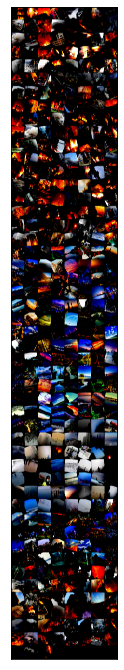

In [4]:
for ds_out in [train_ds_out]:
    result, outputs_dict = ds_out['result'], ds_out['outputs_dict']
    outputs = torch.vstack(outputs_dict['y_pred']).to(device)
    _, preds = torch.max(outputs, 1)
    preds = preds.view(-1)
    y_true = torch.cat(outputs_dict['y_true'], dim=0).to(device).view(-1)

    errors = torch.eq(preds, y_true)
    print(torch.count_nonzero(errors))
    error_indices = list()
    error_imgs = list()
    error_labels = list()
    for i, (img, label) in enumerate(train_ds):
        if preds[i] != label:
            # print(i)
            error_indices.append(i)
            error_imgs.append(img)
            error_labels.append(label)
        # if errors[i] == 0:
        #     print(i)
    images = torch.stack(error_imgs, dim=0)
    labels = torch.Tensor(error_labels)
    print(images.size())
    print(labels.size())
    # print('labels:', labels)
    fig, ax = plt.subplots(figsize=(12, 12))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images.cpu(), nrow=8).permute(1, 2, 0))
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
tensor(58, device='cuda:0')
torch.Size([1, 3, 256, 256])
torch.Size([1])


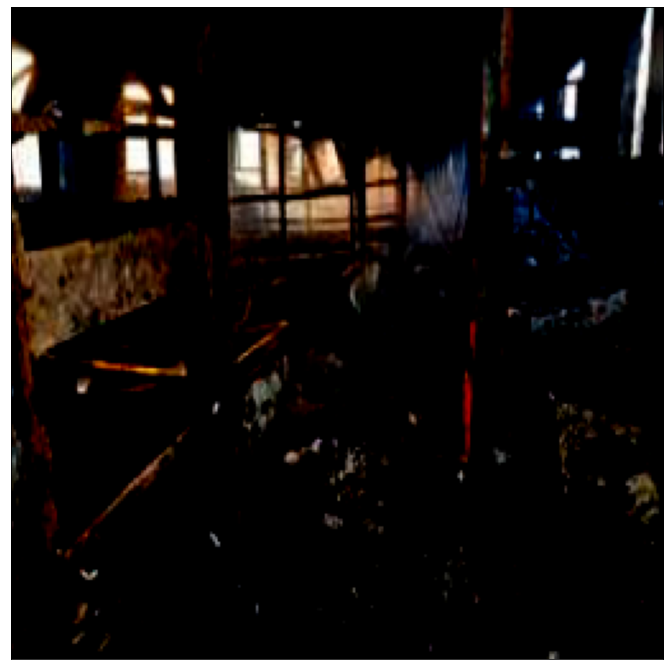

In [5]:
for ds_out in [valid_ds_out]:
    result, outputs_dict = ds_out['result'], ds_out['outputs_dict']
    outputs = torch.vstack(outputs_dict['y_pred']).to(device)
    _, preds = torch.max(outputs, 1)
    preds = preds.view(-1)
    y_true = torch.cat(outputs_dict['y_true'], dim=0).to(device).view(-1)

    errors = torch.eq(preds, y_true)
    print(torch.count_nonzero(errors))
    error_indices = list()
    error_imgs = list()
    error_labels = list()
    for i, (img, label) in enumerate(valid_ds):
        if preds[i] != label:
            # print(i)
            error_indices.append(i)
            error_imgs.append(img)
            error_labels.append(label)
        # if errors[i] == 0:
        #     print(i)
    images = torch.stack(error_imgs, dim=0)
    labels = torch.Tensor(error_labels)
    print(images.size())
    print(labels.size())
    # print('labels:', labels)
    fig, ax = plt.subplots(figsize=(12, 12))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images.cpu(), nrow=8).permute(1, 2, 0))
    plt.show()

## Confuse Matrix(2 classes)

traindataset size: 1232
tensor([[999.,   1.],
        [  0., 232.]])
tensor([0.9990, 1.0000])


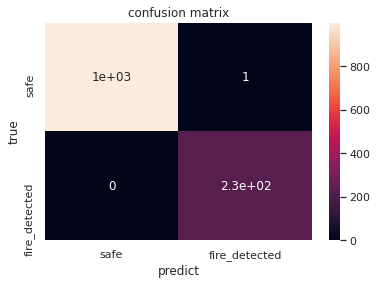

In [6]:
for ds_out in [train_ds_out]:
    result, outputs_dict = ds_out['result'], ds_out['outputs_dict']
    outputs = torch.vstack(outputs_dict['y_pred']).to(device)
    y_true = torch.cat(outputs_dict['y_true'], dim=0).to(device).view(-1)
    print(f'traindataset size: {len(y_true)}')
    f = plt_confusion_matrix(outputs,
                             y_true, 
                             2,
                             train_ds.classes)
    plt.show()

testdataset size: 59
tensor([[30.,  0.],
        [ 1., 28.]])
tensor([1.0000, 0.9655])


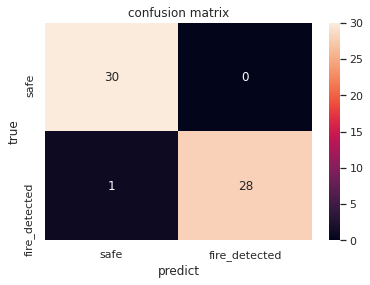

In [7]:
for ds_out in [valid_ds_out]:
    result, outputs_dict = ds_out['result'], ds_out['outputs_dict']
    outputs = torch.vstack(outputs_dict['y_pred']).to(device)
    y_true = torch.cat(outputs_dict['y_true'], dim=0).to(device).view(-1)
    print(f'testdataset size: {len(y_true)}')
    f = plt_confusion_matrix(outputs,
                             y_true, 
                             2,
                             valid_ds.classes)
    plt.show()